In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
import joblib
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
data =pd.read_csv( "/content/drive/MyDrive/DoAn/healthcare-dataset-stroke-data.csv")

In [ ]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from tabpfn_client import TabPFNClassifier
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
tabpfn_model = TabPFNClassifier()
print(tabpfn_model.get_params())

{'average_before_softmax': False, 'balance_probabilities': False, 'categorical_features_indices': None, 'device': 'auto', 'fit_mode': 'fit_preprocessors', 'ignore_pretraining_limits': False, 'inference_config': None, 'inference_precision': 'auto', 'memory_saving_mode': 'auto', 'model_path': 'auto', 'n_estimators': 4, 'n_jobs': -1, 'random_state': 0, 'softmax_temperature': 0.9}


Using device: cuda
Cột 'id' đã được xóa thành công.
Kích thước mới của DataFrame: (5110, 11)

Dữ liệu sau khi xóa cột 'id':


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Đã thay thế giá trị thiếu trong 'bmi' bằng trung bình: 28.89
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END balance_probabilities=True, softmax_temperature=0.5; total time=   1.4s
[CV] END balance_probabilities=True, softmax_temperature=0.5; total time=   1.3s
[CV] END balance_probabilities=True, softmax_temperature=0.5; total time=   1.4s
[CV] END balance_probabilities=True, softmax_temperature=0.55; total time=   1.1s
[CV] END balance_probabilities=True, softmax_temperature=0.55; total time=   1.2s
[CV] END balance_probabilities=True, softmax_temperature=0.55; total time=   1.2s
[CV] END balance_probabilities=True, softmax_temperature=0.6000000000000001; total time=   1.2s
[CV] END balance_probabilities=True, softmax_temperature=0.6000000000000001; total time=   1.1s
[CV] END balance_probabilities=True, softmax_temperature=0.6000000000000001; total time=   1.1s
[CV] END balance_probabilities=True, softmax_temperature=0.6500000000000001; total time=   1.1s
[CV] 

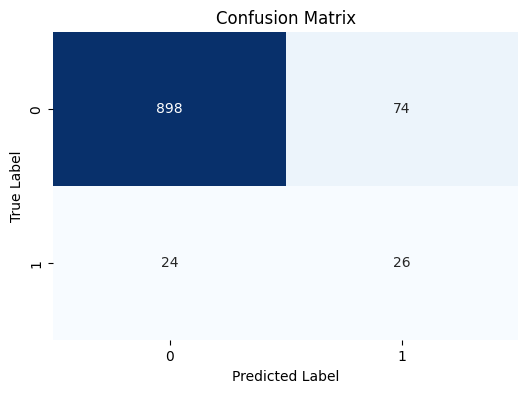

<Figure size 600x400 with 0 Axes>

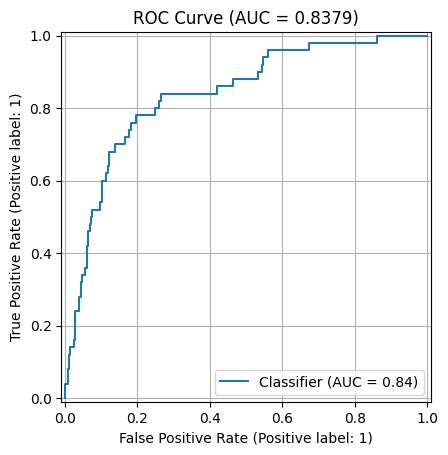


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       972
           1       0.26      0.52      0.35        50

    accuracy                           0.90      1022
   macro avg       0.62      0.72      0.65      1022
weighted avg       0.94      0.90      0.92      1022



In [ ]:
from tabpfn import TabPFNClassifier
import numpy as np
import torch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, confusion_matrix, RocCurveDisplay
)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
# 1. Kiểm tra thiết bị
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

data =pd.read_csv( "/content/drive/MyDrive/DoAn/healthcare-dataset-stroke-data.csv")
# Kiểm tra lại df
if data is not None:
    useless_col = 'id'
    if useless_col in data.columns:
        # Thực hiện xóa cột 'id'
        data = data.drop(useless_col, axis=1)
        print(f"Cột '{useless_col}' đã được xóa thành công.")
        print(f"Kích thước mới của DataFrame: {data.shape}")
        # Hiển thị lại 5 dòng đầu sau khi xóa cột để kiểm tra
        print("\nDữ liệu sau khi xóa cột 'id':")
        display(data.head())
    else:
        print(f"Cột '{useless_col}' không tồn tại trong DataFrame.")
else:
    print("DataFrame 'df' chưa được tải.")
# 1. Xử lý giá trị thiếu
if data['bmi'].isnull().any():
    bmi_mean = data['bmi'].mean()
    data['bmi'].fillna(bmi_mean, inplace=True)
    print(f"Đã thay thế giá trị thiếu trong 'bmi' bằng trung bình: {bmi_mean:.2f}")
else:
    print("Không có giá trị thiếu trong cột 'bmi'.")
# 2. Mã hóa các cột phân loại
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 3. Tách đặc trưng và nhãn
X = data.drop(columns=['stroke'])
y = data['stroke']

# 4. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 3. Tập tham số cho Grid Search
param_grid = {
    "softmax_temperature": np.arange(0.5, 2.1, 0.05),
    "balance_probabilities": [True],
}

# 4. GridSearchCV để tìm mô hình tốt nhất theo AUC
model = TabPFNClassifier(device=device)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=1  # Hoặc -1 nếu máy khỏe
)

grid_search.fit(X_train, y_train)
best_model_pfn = grid_search.best_estimator_

# 5. Lưu mô hình tốt nhất
joblib.dump(best_model_pfn, '/content/drive/MyDrive/best_tabpfn_model_train.pkl')

# 6. Hàm tìm threshold tối ưu F1
def find_best_threshold(y_true, y_probs):
    thresholds = np.arange(0.01, 1.0, 0.01)
    best_threshold = 0.5
    best_f1 = 0
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    return best_threshold, best_f1

# 7. Dự đoán & đánh giá
y_pred_proba = best_model_pfn.predict_proba(X_test)[:, 1]
best_threshold, best_f1 = find_best_threshold(y_test, y_pred_proba)
print(f"\n⚡ Best threshold for F1: {best_threshold:.2f} (F1 = {best_f1:.4f})")
y_pred = (y_pred_proba >= best_threshold).astype(int)

# 8. In kết quả đánh giá
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print("\n🎯 Tham số tốt nhất:")
print(grid_search.best_params_)

print("\n📊 Kết quả đánh giá:")
print(f"Accuracy : {accuracy:.4f}")
print(f"AUC      : {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Recall   : {recall:.4f}")

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 10. ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title(f"ROC Curve (AUC = {auc:.4f})")
plt.grid(True)
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=2))
# 11. (Tùy chọn) Lưu kết quả GridSearch ra CSV
# df_results = pd.DataFrame(grid_search.cv_results_)
# df_results.to_csv('/content/drive/MyDrive/tabpfn_grid_results.csv', index=False)
